# VGG16를 이용한 개와 고양이 분류 (2020.08.15.)

## 1. 사전 학습 모델 불러오기

#### 사전 학습 모델 VGG16 (제안: 옥스포드 대학 Visual Geometry Group, 학습데이터: ImageNet)

In [1]:
#from tensorflow.python.keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import VGG16

model = VGG16() 

Using TensorFlow backend.


#### 사전 학습 모델 VGG16의 요약 (입력층의 크기: 224x224, 출력층의 크기: 1000)
#### VGG16은 이미지 1장의 입력에 대해서 1000클래스에 대해 각각의 분류 확률을 출력

In [2]:
model.summary() 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 2. 사전 학습 모델을 이용하여 예측할 대상 이미지 준비하기

#### 예측할 대상 이미지를 VGG16의 입력 크기 224X224로 리사이즈하여 불러온다

In [3]:
#from tensorflow.python.keras.preprocessing.image import load_img
from keras.preprocessing.image import load_img

img_dog = load_img('./sample_images/dog1.png', target_size=(224,224))
img_cat = load_img('./sample_images/cat1.png', target_size=(224,224))
img_cat0 = load_img('./sample_images/cat0.jpg', target_size=(224,224))

In [4]:
img_dog, img_cat, img_cat0

(<PIL.Image.Image image mode=RGB size=224x224 at 0x261FA4D7288>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x26181A94F48>,
 <PIL.Image.Image image mode=RGB size=224x224 at 0x26181A3FF48>)

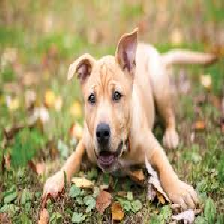

In [5]:
img_dog

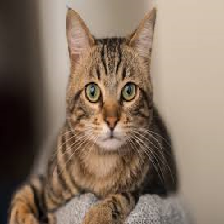

In [6]:
img_cat

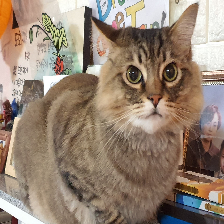

In [7]:
img_cat0

#### load_img()는 Pillow라고 부르는 이미지 라이브러리의 데이터 형식이므로 그대로 이용할 수 없다.
#### 일반적인 수치 데이터로 취급하기 위해 numpy.ndarray로 변환한다.

In [8]:
#from tensorflow.python.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import img_to_array

arr_dog = img_to_array(img_dog)
arr_cat = img_to_array(img_cat)
arr_cat0 = img_to_array(img_cat0)

#### 이미지 각 채널의 중심화와 RGB로부터 BGR로 변환, 이미지를 VGG16 모델이 학습할 때와 같은 형태로 맞춰서 변환한다.

In [9]:
#from tensorflow.python.keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import preprocess_input

arr_dog = preprocess_input(arr_dog)
arr_cat = preprocess_input(arr_cat)
arr_cat0 = preprocess_input(arr_cat0)

#### 일반적으로 딥러닝 모델은 여러 장의 이미지를 한 번에 입력하고, 입력한 이미지의 개수만큼 결과를 출력한다.
#### 일괄로 입력하기 위해 두 장의 이미지를 하나의 배열로 만든 입력 데이터를 작성한다.

In [10]:
import numpy as np

arr_input = np.stack([arr_dog, arr_cat, arr_cat0])

In [11]:
# 입력 데이터의 shape 확인
print('shape of arr_input: ', arr_input.shape)

shape of arr_input:  (3, 224, 224, 3)


## 3. 사전 학습 모델을 이용하여 예측하기

In [12]:
# 예측값 산출
probs = model.predict(arr_input)

# 예측값의 shape 확인
print('shape of probs: ', probs.shape)

# 예측값 출력
probs

shape of probs:  (3, 1000)


array([[1.0683688e-06, 5.0699163e-07, 3.6312740e-06, ..., 6.5868485e-06,
        4.9424689e-05, 4.4088963e-05],
       [8.7440338e-07, 3.9746214e-06, 1.5670515e-06, ..., 8.8197186e-07,
        4.8784845e-05, 3.0789161e-04],
       [1.5343228e-07, 1.4676343e-05, 2.3207399e-06, ..., 2.0091668e-06,
        3.5837703e-04, 1.1209199e-03]], dtype=float32)

#### 1000 클래스 각각의 확률만으로는 클래스의 이름을 판단할 수 없으므로
#### decode_predictions 함수를 이용해서 결과를 클래스 이름으로 변환하고, 상위 5개만 표시한다.

In [13]:
#from tensorflow.python.keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import decode_predictions
results = decode_predictions(probs)

In [14]:
# 개 이미지의 예측 결과 표시 (상위 5개)
results[0]

[('n02091134', 'whippet', 0.16411115),
 ('n02106662', 'German_shepherd', 0.14274143),
 ('n02091831', 'Saluki', 0.109277606),
 ('n02109047', 'Great_Dane', 0.08915815),
 ('n02115641', 'dingo', 0.08423077)]

In [15]:
# 고양이 이미지의 예측 결과 표시 (상위 5개)
results[1]

[('n02124075', 'Egyptian_cat', 0.45604983),
 ('n02123045', 'tabby', 0.33454403),
 ('n02123159', 'tiger_cat', 0.15450294),
 ('n02127052', 'lynx', 0.009047751),
 ('n04040759', 'radiator', 0.00225057)]

In [16]:
# 고양이 이미지의 예측 결과 표시 (상위 5개)
results[2]

[('n02123045', 'tabby', 0.17105368),
 ('n04070727', 'refrigerator', 0.14144717),
 ('n02123159', 'tiger_cat', 0.072429515),
 ('n03207941', 'dishwasher', 0.0673834),
 ('n02124075', 'Egyptian_cat', 0.044442333)]

## 4. 예측 결과 평가하기

Whippet


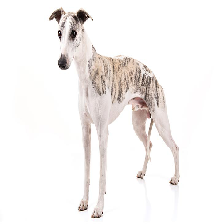

In [17]:
dog = load_img('./sample_images/dogs_cats/whippet.jpg', target_size=(224,224))
print('Whippet')
dog

Egyptian Cat


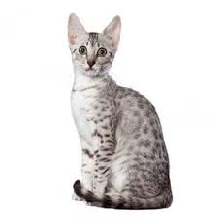

In [18]:
cat = load_img('./sample_images/dogs_cats/egyptian_cat.jpg', target_size=(224,224))
print('Egyptian Cat')
cat

Star Cat


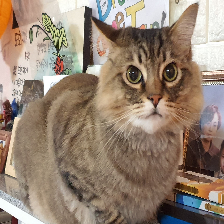

In [19]:
cat = load_img('./sample_images/dogs_cats/star_cat.jpg', target_size=(224,224))
print('Star Cat')
cat

## END

## Array to Image

In [20]:
import tensorflow as tf
from PIL import Image
img_data = np.random.random(size=(100, 100, 3))
pil_img = tf.keras.preprocessing.image.array_to_img(img_data)

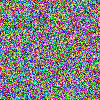

In [21]:
pil_img

## Image to Array

In [22]:
array = tf.keras.preprocessing.image.img_to_array(pil_img)

In [23]:
array.shape

(100, 100, 3)

In [24]:
array

array([[[157.,   4.,  64.],
        [ 41.,  91., 134.],
        [ 20., 136., 113.],
        ...,
        [190.,  37., 127.],
        [100., 152., 237.],
        [120., 107., 146.]],

       [[ 20.,  78., 248.],
        [ 32.,  82.,  24.],
        [ 16., 114., 103.],
        ...,
        [229., 101., 124.],
        [ 95., 145.,  33.],
        [191.,  62., 215.]],

       [[ 57., 192.,   6.],
        [142., 236.,   6.],
        [ 27., 153., 135.],
        ...,
        [100.,  29.,  44.],
        [ 69., 191.,  64.],
        [ 36., 113.,  15.]],

       ...,

       [[239., 199., 128.],
        [134., 148.,  99.],
        [202.,  93.,  18.],
        ...,
        [110., 220., 142.],
        [  0., 107.,  48.],
        [ 76.,   9., 119.]],

       [[191., 248., 120.],
        [ 97., 129., 158.],
        [ 59., 191.,  80.],
        ...,
        [  7.,  78., 227.],
        [ 84., 165.,  26.],
        [215., 106.,  66.]],

       [[ 43.,  27.,  53.],
        [208.,   7., 138.],
        [ 33.,  